## Instantiate Base Settings, Loading Cortex Dataset

In [12]:
import os
#!pip install scvi==0.2.4
import scvi
root_path = '/home/data/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here'
child_path = os.path.join(root_path,'data')
n_epochs_all = None
show_plot = True
import pickle
def savePickle(data, picklefile):
    """
    :param data: Data to be saved
    :param picklefile: Filename for output Pickle file, should have .pickle ending
    """
 
    with open(picklefile, "wb") as f:
        pickle.dump(data, f)
    f.close()
    
def loadPickle(picklefile):
    
    with open(picklefile, "rb") as f:
        data = pickle.load(f)
    f.close()
    return data

cortex_loc = os.path.join(child_path,'cortex_24may.pickle')
cortex_dataset = loadPickle(picklefile = cortex_loc)
pbmc_loc = os.path.join(child_path,'pbmc_24may.pickle')
pbmc_dataset = loadPickle(picklefile = pbmc_loc)

In [78]:
cortex_dataset.__dict__

{'save_path': '/home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data',
 'download_name': 'expression.bin',
 'url': 'https://storage.googleapis.com/linnarsson-lab-www-blobs/blobs/cortex/expression_mRNA_17-Aug-2014.txt',
 'genes_fish': [],
 'genes_to_keep': [],
 'additional_genes': 558,
 'precise_labels': array([0, 0, 0, ..., 8, 8, 8]),
 'dense': True,
 '_X': array([[ 28.,  22., 116., ...,   6.,  14.,   3.],
        [ 41.,  18.,  12., ...,   9.,   7.,   8.],
        [ 57.,  26.,  46., ...,   7.,  13.,   9.],
        ...,
        [  1.,   0.,   0., ...,   1.,   0.,   0.],
        [  1.,   1.,   0., ...,   1.,   0.,   1.],
        [  0.,   0.,   0., ...,   3.,   1.,   0.]], dtype=float32),
 'nb_genes': 558,
 'local_means': array([[8.455475],
        [8.455475],
        [8.455475],
        ...,
        [8.455475],
        [8.455475],
        [8.455475]], dtype=float32),
 'local_vars': array([[0.44135004],
        [0.44135004],
        [0.44135004],
        .

## Other Datasets

In [38]:

pbmc_loc = os.path.join(child_path,'pbmc_24may.pickle')
#pbmc_dataset = loadPickle(picklefile = pbmc_loc)

from scvi.dataset import PbmcDataset
pbmc_dataset = PbmcDataset(save_path=child_path) 
savePickle(data=pbmc_dataset,picklefile = pbmc_loc)

#pbmc_dataset = loadPickle(picklefile = pbmc_loc)



File /home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data/gene_info_pbmc.csv already downloaded
File /home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data/pbmc_metadata.pickle already downloaded
File /home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data/10X/pbmc8k/filtered_gene_bc_matrices.tar.gz already downloaded
Preprocessing dataset
Finished preprocessing dataset
File /home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data/10X/pbmc4k/filtered_gene_bc_matrices.tar.gz already downloaded
Preprocessing dataset
Finished preprocessing dataset
Keeping 33694 genes
Downsampling from 12721 to 11990 cells
Downsampling from 33694 to 3346 genes
Downsampling from 11990 to 11990 cells


In [39]:
pbmc_dataset.__dict__

{'save_path': '/home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data',
 'urls': ['https://github.com/YosefLab/scVI-data/raw/master/gene_info.csv',
  'https://github.com/YosefLab/scVI-data/raw/master/pbmc_metadata.pickle'],
 'download_names': ['gene_info_pbmc.csv', 'pbmc_metadata.pickle'],
 'de_metadata':       Unnamed: 0             ENSG        GS  CD_logFC  CD_AveExpr      CD_t  \
 0              5  ENSG00000188976     NOC2L  0.248976    4.193230  1.308282   
 1              7  ENSG00000187608     ISG15 -0.036463    5.769094 -0.216990   
 2             36  ENSG00000149527     PLCH2  0.505600    3.225463  1.834575   
 3             37  ENSG00000157881     PANK4 -0.093142    4.319701 -0.772409   
 4             40  ENSG00000157873  TNFRSF14  0.073292    4.949553  0.353608   
 5             44  ENSG00000130764    LRRC47  0.195746    5.595843  1.374298   
 6             46  ENSG00000198912  C1orf174  0.491782    4.741658  3.127764   
 7             52  ENS

In [50]:
pbmc_total = find_arr_element_count(arr=pbmc_dataset._X.toarray())

zero_rate_pbmc = np.round(100*np.divide(pbmc_total - np.count_nonzero(pbmc_dataset._X.toarray()),pbmc_total),2)
zero_rate_pbmc

86.32

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

In [19]:
# Count amount of 0 elements for comparison
import numpy as np

def find_arr_element_count(arr):
    return arr.shape[0]*arr.shape[1]
pbmc_total = find_arr_element_count(arr=pbmc_dataset._X)
cortex_total = find_arr_element_count(arr=cortex_dataset._X)
print(pbmc_total)
print(np.count_nonzero(pbmc_dataset._X))
zero_rate_pbmc = np.round(100*np.divide(pbmc_total - np.count_nonzero(pbmc_dataset._X),pbmc_total),2)
#zero_rate_cortex = np.round(100*np.divide(cortex_total - np.count_nonzero(cortex_dataset._X),cortex_total),2)
#print(f"Percentage of 0 elements in PBMC Gene Expression matrix is {zero_rate_pbmc}")
#print(f"Percentage of 0 elements in Mouse Cortex Gene Expression matrix is {zero_rate_cortex}")

40118540


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().

In [30]:
#(cortex_total-np.count_nonzero(cortex_dataset._X))/cortex_total

cortex_dataset.__dict__

{'save_path': '/home/alaridl/pCloudDrive/W/dl_projects_combined/Modules/2_vi_scvi/scvi_work_here/data',
 'download_name': 'expression.bin',
 'url': 'https://storage.googleapis.com/linnarsson-lab-www-blobs/blobs/cortex/expression_mRNA_17-Aug-2014.txt',
 'genes_fish': [],
 'genes_to_keep': [],
 'additional_genes': 558,
 'precise_labels': array([0, 0, 0, ..., 8, 8, 8]),
 'dense': True,
 '_X': array([[ 28.,  22., 116., ...,   6.,  14.,   3.],
        [ 41.,  18.,  12., ...,   9.,   7.,   8.],
        [ 57.,  26.,  46., ...,   7.,  13.,   9.],
        ...,
        [  1.,   0.,   0., ...,   1.,   0.,   0.],
        [  1.,   1.,   0., ...,   1.,   0.,   1.],
        [  0.,   0.,   0., ...,   3.,   1.,   0.]], dtype=float32),
 'nb_genes': 558,
 'local_means': array([[8.455475],
        [8.455475],
        [8.455475],
        ...,
        [8.455475],
        [8.455475],
        [8.455475]], dtype=float32),
 'local_vars': array([[0.44135004],
        [0.44135004],
        [0.44135004],
        .

In [3]:
one = np.count_nonzero(pbmc_dataset.X)

In [4]:
from scvi.dataset import CortexDataset
cortex_dataset = CortexDataset(save_path = child_path)

print(pbmc_dataset) 
#This dataset that includes 8,617 cord blood mononuclear cells profiled using 10x along with for each cell 13 
#well-characterized mononuclear antibodies. We kept the top 600 genes by variance.
from scvi.dataset.cite_seq import CbmcDataset
cbmc_gene_dataset = CbmcDataset()
cbmc_loc = os.path.join(child_path,'cbmc_24may.pickle')
#savePickle(data=cbmc_gene_dataset,picklefile = cbmc_loc)



Preprocessing Cortex data
Finished preprocessing Cortex data


## Naming Variables in Mouse Cortex Dataset
The Mouse Cortex Cells dataset contains 3005 mouse cortex cells and gold-standard labels for seven distinct cell types. Each cell type corresponds to a cluster to recover. We retain top 558 genes ordered by variance.
**cortex_dataset.__dict__**

In [64]:
X = cortex_dataset._X
precise_labels = cortex_dataset.precise_labels
Y = cortex_dataset.labels[:,0]
#print(f"type of X is {type(X)}")
#print(f"type of prec labels is {type(precise_labels)}")
#print(f"type of labels is {type(labels)}")
#test = X[:, :-1]
#testlab = X[:, -1]
print(f"Labels shape is {Y.shape}")
print(f"X shape is {X.shape}")
print(f"Amount of unique labels is {len(np.unique(Y))} that are then {cortex_dataset.cell_types}")

Labels shape is (3005,)
X shape is (3005, 558)
Amount of unique labels is 7 that are then ['astrocytes_ependymal' 'endothelial-mural' 'interneurons' 'microglia'
 'oligodendrocytes' 'pyramidal CA1' 'pyramidal SS']


**So this means we have 3005 mouse cells of 7 different populations, containing 558 different genes, ordered by variance**

In [79]:
# CELLS IN ROWS, GENES IN COLUMNS
#cbmc_gene_dataset.__dict__
#cortex_dataset.__dict__
#cortex_dataset.X

In [99]:
from scvi.dataset import CortexDataset
from scvi.models import *
from scvi.inference import UnsupervisedTrainer
import torch


*If you haven't import the Cortex Dataset, import it again*

* Zeisel, Amit, et al. "Cell types in the mouse cortex and hippocampus revealed by single-cell RNA-seq." Science 347.6226 (2015): 1138-1142. 

In [40]:
cortex_dataset = CortexDataset(save_path=save_path)

File data/expression.bin already downloaded
Preprocessing Cortex data
Finished preprocessing Cortex data


# Variational Autoencoders

Instead of just learning a function representing the data ( a compressed representation) like autoencoders, variational autoencoders learn the parameters of a probability distribution representing the data. Since it learns to model the data, we can sample from the distribution and generate new input data samples. 

So we understand that the main difference comes from the fact that when the hidden layer parameters encode an actual probability distribution, then we can generate samples from this probability distribution.

Variational Autoencoder was introduced in 2014 by Diederik Kingma and Max Welling with intention how autoencoders can be generative.

VAE are generative autoencoders, meaning they can generate new instances that look similar to original dataset used for training.
As mentioned before, VAE learns probability distribution of the data whereas autoencoders learns a function to map each input to a number and decoder learns the reverse mapping.

**Think : Why cannot we generate samples when the hidden layer activations don't correspond to a probability distribution?**

In [28]:
os.listdir("img")

['autoencoder_structure.PNG',
 'variational_autoencoder.png',
 'nn_all_combined_image.jpg']

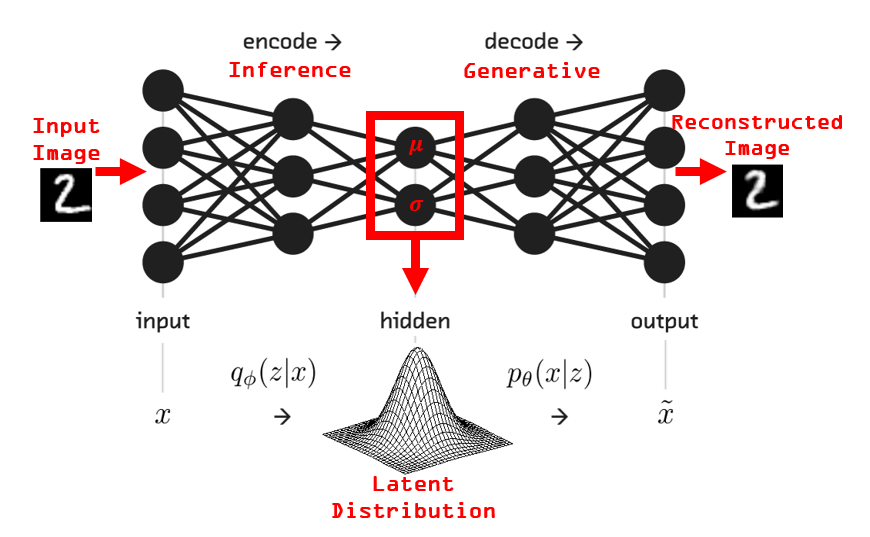

In [105]:
Image(filename="./img/variational_autoencoder.png")

## Running the SCVI Implementation of Variational Autoencoder

* __n_epochs__: Maximum number of epochs to train the model. If the likelihood change is small than a set threshold training will stop automatically. 
* __lr__: learning rate. Set to 0.001 here. 
* __use_batches__: If the value of true than batch information is used in the training. Here it is set to false because the cortex data only contains one batch. 
* __use_cuda__: Set to true to use CUDA. 


In [34]:
!conda list

/bin/sh: 1: conda: not found


In [33]:

!pip install --upgrade numpy
n_epochs=500 if n_epochs_all is None else n_epochs_all
lr=1e-3
use_batches=True
use_cuda=True
from scvi.dataset import CortexDataset 
from scvi.models import *
from scvi.inference import UnsupervisedTrainer


     |████████████████████████████████| 17.3MB 249kB/s eta 0:00:01    |█████                           | 2.7MB 371kB/s eta 0:00:40     |██████████▉                     | 5.9MB 835kB/s eta 0:00:14     |███████████▏                    | 6.1MB 835kB/s eta 0:00:14     |███████████▏                    | 6.1MB 573kB/s eta 0:00:20     |█████████████▎                  | 7.2MB 671kB/s eta 0:00:16     |███████████████▏                | 8.2MB 566kB/s eta 0:00:17     |███████████████▊                | 8.5MB 830kB/s eta 0:00:11     |████████████████▏               | 8.8MB 830kB/s eta 0:00:11     |████████████████▍               | 8.9MB 830kB/s eta 0:00:11     |█████████████████▉              | 9.7MB 436kB/s eta 0:00:18     |██████████████████              | 9.7MB 436kB/s eta 0:00:18     |████████████████████▌           | 11.1MB 487kB/s eta 0:00:13     |█████████████████████           | 11.3MB 439kB/s eta 0:00:14     |██████████████████████          | 12.0MB 535kB/s eta 0:00:11
ERROR: scvi 0.2.4 has

AttributeError: module 'numpy.core.numerictypes' has no attribute '_typestr'

**Train the model and output model likelihood every 5 epochs**
**If a pre-trained model already exist in the save_path then load the same model rather than re-training it** 

In [29]:
vae = VAE(cortex_dataset.nb_genes, n_batch=cortex_dataset.n_batches * use_batches)
trainer = UnsupervisedTrainer(vae,
                              cortex_dataset,
                              train_size=0.75,
                              use_cuda=True,
                              frequency=5)

#if os.path.isfile('%s/vae.pkl' % save_path ):
#    trainer.model.load_state_dict(torch.load('%s/vae.pkl' % save_path))
#    trainer.model.eval()
#else:
trainer.train(n_epochs=n_epochs, lr=lr)
save_path = child_path
torch.save(trainer.model.state_dict(), '%s/vae_cortex.pkl' % save_path)

NameError: name 'VAE' is not defined

** Plotting the likelihood change across the 500 epochs of training: blue for training error and orange for testing error.**

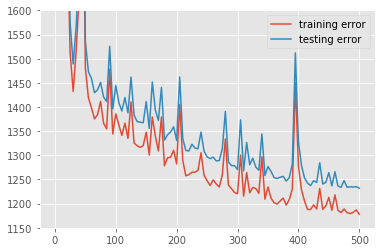

In [91]:
%matplotlib inline
ll_train_set = trainer.history["ll_train_set"]
ll_test_set = trainer.history["ll_test_set"]
x = np.linspace(0,500,(len(ll_train_set)))
plt.plot(x, ll_train_set,label="training error")
plt.plot(x, ll_test_set, label = "testing error")
plt.ylim(1150,1600)
plt.legend(loc = "upper right")
plt.show()

## Obtaining the posterior object and sample latent space from it

The posterior object contains a model and a gene_dataset, as well as additional arguments that for Pytorch's `DataLoader`. It also comes with many methods or utilities querying the model, such as differential expression, imputation and differential analyisis.


To get an ordered output result, we might use `.sequential` posterior's method which return another instance of posterior (with shallow copy of all its object references), but where the iteration is in the same ordered as its  indices attribute.



In [92]:
trainer.history["ll_trin_set"]

[]

In [93]:
full = trainer.create_posterior(trainer.model, cortex_dataset, indices=np.arange(len(cortex_dataset)))
latent, batch_indices, labels = full.sequential().get_latent()
batch_indices = batch_indices.ravel()

## Visualizing the latent space

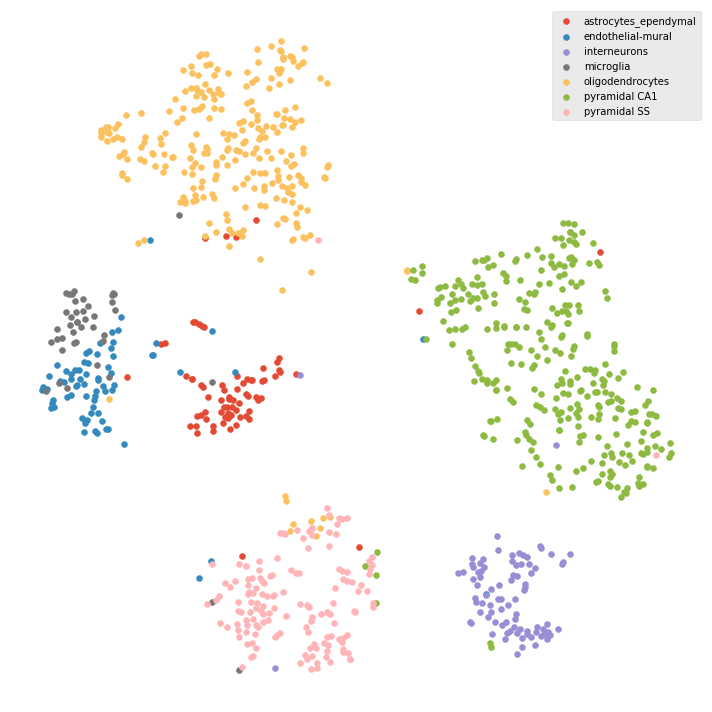

In [94]:
n_samples_tsne = 1000
full.show_t_sne(n_samples=n_samples_tsne, color_by='labels')

## Imputation


The ability to impute missing values is useful in practical applications in addition to providing an assay for generalization performance. In the following analysis, we benchmark scVI against BISCUIT, ZINB-WaVE and ZIFA, as well as MAGIC, which provides imputation without explicit statistical modeling. To evaluate these methods on a given dataset, we generated a **corrupted training set**, and then fitted the perturbed dataset with each of the benchmark methods and evaluate them by comparing the imputed values to the original ones (Methods 4.7). Overall, we observe that the imputation accuracy of scVI is higher or comparable (less than one transcript for median error) across all datasets

#### Corrupting the datasets for imputation benchmarking. 

Two different approaches to measure the robustness of algorithms to noise in the data: 

- **Uniform zero introduction**: select randomly a rate r% of the non-zero entries and multiply the entry n with a Ber(0.9) random variable.
- **Binomial data corruption**: select a rate r% of the matrix and replace an entry n by a Bin(n, 0.2) random variable.

By default, the rate r is set a 0.1

#### Accuracy of imputing missing data 

As imputation tantamount to replace missing data by its mean conditioned on being observed, we use the median L1 distance between the original dataset and the imputed values for corrupted entries only.
Parameters:
* The rate of simulated dropout is defined by __rate__, here set ot 0.1 

In [62]:
n_epochs = 400 if n_epochs_all is None else n_epochs_all
vae2 = VAE(cortex_dataset.nb_genes, n_batch=cortex_dataset.n_batches * use_batches)
trainer2 = UnsupervisedTrainer(vae,
                              cortex_dataset,
                              train_size=0.75,
                              use_cuda=use_cuda)

trainer2.corrupt_posteriors(rate=0.1, corruption="uniform")
trainer2.train(n_epochs)
trainer2.uncorrupt_posteriors()



training: 100%|██████████| 400/400 [01:50<00:00,  3.92it/s]


TypeError: imputation_benchmark() got an unexpected keyword argument 'show_plot'

In [20]:
# Median of medians for all distances
imputation_errors = np.abs(np.concatenate(original_list) - np.concatenate(imputed_list))
median_imputation_score = np.median(imputation_errors)
print(median_imputation_score)

2.3826342


We then plot the distribution of absolute errors between the imputed value and the true value at the dropout positions. 

Note: The imputed value __px_rate__ is the rate parameter (expected value) of the Zero-Inflated Negative Binomial (ZINB) distribution.

(array([1.800e+01, 5.700e+01, 2.380e+02, 1.058e+03, 3.063e+03, 3.575e+03,
        7.760e+02, 6.900e+01, 1.700e+01, 3.000e+00]),
 array([-2.7821774 , -2.1503756 , -1.5185736 , -0.8867717 , -0.25496978,
         0.37683213,  1.0086341 ,  1.6404359 ,  2.2722378 ,  2.9040399 ,
         3.5358417 ], dtype=float32),
 <a list of 10 Patch objects>)

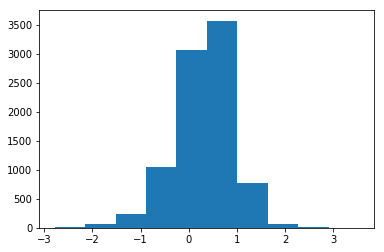

In [21]:
plt.hist(np.log10(imputation_errors))

## Obtaining the imputed values for the whole dataset after the training

### Imputing without artificial corruption

Through the imputation benchmark above, we have assessed the strength of scVI for this task. 

To actually perform the imputation on a model trained on regular data, we might use the `.imputation` method. 

In [23]:
imputed_values = full.sequential().imputation()

## Differential Expression
From the trained VAE model we can sample the gene expression rate for each gene in each cell. For the two populations of interest, we can then randomly sample pairs of cells, one from each population to compare their expression rate for a gene. The degree of differential expression is measured by __logit(p/(1-p))__ where __p__ is the probability of a cell from population A having a higher expression than a cell from population B. We can form the null distribution of the DE values by sampling pairs randomly from the combined population.

The following example is implemented for the cortext dataset, vary __cell_types__ and __genes_of_interest__ for other datasets. 

**1. Set population A and population B for comparison**

In [25]:
cell_types = gene_dataset.cell_types
print(gene_dataset.cell_types)
# oligodendrocytes (#4) VS pyramidal CA1 (#5)
couple_celltypes = (4, 5)  # the couple types on which to study DE

print("\nDifferential Expression A/B for cell types\nA: %s\nB: %s\n" %
      tuple((cell_types[couple_celltypes[i]] for i in [0, 1])))

cell_idx1 = gene_dataset.labels.ravel() == couple_celltypes[0]
cell_idx2 = gene_dataset.labels.ravel() == couple_celltypes[1]

['astrocytes_ependymal' 'endothelial-mural' 'interneurons' 'microglia'
 'oligodendrocytes' 'pyramidal CA1' 'pyramidal SS']

Differential Expression A/B for cell types
A: oligodendrocytes
B: pyramidal CA1



**2. Define parameters**
* __n_samples__: the number of times to sample __px_scales__ from the vae model for each gene in each cell.
* __M_permutation__: Number of pairs sampled from the px_scales values for comparison.

In [26]:
n_samples = 100
M_permutation = 100000

In [29]:
de_res = full.differential_expression_score(cell_idx1, cell_idx2, n_samples=n_samples, 
                                   M_permutation=M_permutation)

**3. Print out the differential expression value**
* bayes1: The bayes factor for cell type 1 having a higher expression than cell type 2
* bayes2: The bayes factor for cell type 2 having a higher expression than cell type 1 (should be ~ -bayes1, but not equal due to ties in comparing per cell expression, and stochasticity of sampling. 
* bayes*i*_permuted: the bayes factor when cell types labels are premuted 
* mean*i*: average UMI counts in cell type *i*
* nonz*i*: proportion of non-zero expression in cell type *i*
* norm_mean*i*: average UMI counts in cell type *i* normalized by cell size
* scale*i*: average scVI imputed gene expression scale in cell type *i* 


In [36]:
genes_of_interest = ["THY1", "MBP"]
de_res.filter(items=genes_of_interest,axis=0)

,bayes1,bayes1_permuted,bayes2,bayes2_permuted,mean1,mean2,nonz1,nonz2,norm_mean1,norm_mean2,scale1,scale2
THY1,-4.869328,0.01088,4.907048,0.00500,0.589024,13.569755,0.219512,0.996805,0.060620,1.037373,0.000173,0.002025
MBP,5.118395,0.00636,-5.137166,0.00928,55.318295,2.787008,0.998780,0.452609,5.862776,0.210483,0.011812,0.000588


**4. Plot the null distribution of the DE values**

(array([  3.,  14.,  51., 104., 121., 108.,  91.,  49.,  15.,   2.]),
 array([-0.003     , -0.00021587,  0.00256825,  0.00535238,  0.00813651,
         0.01092064,  0.01370477,  0.01648889,  0.01927302,  0.02205715,
         0.02484128]),
 <a list of 10 Patch objects>)

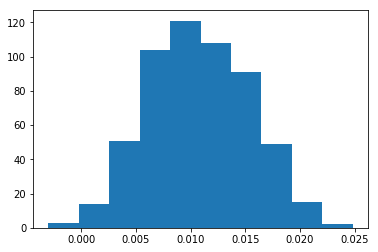

In [37]:
plt.hist(de_res['bayes1_permuted'])

**9. Visualize top 10 most expressed genes per cell types**

In [42]:
per_cluster_de, cluster_id = full.one_vs_all_degenes(cell_labels=gene_dataset.labels.ravel(), min_cells=1)

In [45]:
markers = []
for x in per_cluster_de:
    markers.append(x[:10])
markers = pd.concat(markers)

,bayes1,bayes1_permuted,bayes2,bayes2_permuted,mean1,mean2,nonz1,nonz2,norm_mean1,norm_mean2,scale1,scale2,clusters
AQP4,5.355480,0.030802,-5.076985,-0.002800,20.973215,0.598706,0.937500,0.112549,4.238596,0.064039,0.008815,0.000283,0
SLC1A3,5.273400,0.021601,-5.045035,-0.001200,30.156250,1.977346,0.982143,0.281194,7.133307,0.232307,0.015563,0.000459,0
MT2,4.759152,0.013200,-4.605270,-0.008000,17.535715,1.314275,0.946429,0.262496,3.965583,0.147368,0.007631,0.000378,0
ATP1A2,4.701489,0.012800,-4.517349,-0.014000,55.013393,4.309960,0.955357,0.457030,12.768647,0.635308,0.025185,0.001462,0
CLU,4.625881,0.035604,-4.735693,-0.015600,36.089287,4.473211,0.995536,0.627472,7.999939,0.374060,0.017735,0.000756,0
GPR37L1,4.517349,0.027602,-4.453841,-0.022401,13.642858,0.937073,0.973214,0.165049,3.324102,0.115617,0.006629,0.000465,0
ALDOC,4.489647,0.035204,-4.453841,-0.010400,13.316964,0.864797,0.906250,0.205681,2.967190,0.082002,0.005807,0.000263,0
SLC1A2,4.377580,0.012000,-4.410775,-0.028002,57.000000,8.064725,0.986607,0.801870,12.829376,0.801565,0.029713,0.001438,0
PPAP2B,4.361378,0.016400,-4.240211,-0.022401,12.513392,1.299892,0.964286,0.345559,3.117915,0.148642,0.006256,0.000361,0
PRDX6,4.157867,0.028002,-3.928161,0.011600,21.504465,2.436893,0.973214,0.622438,4.514176,0.244661,0.007962,0.000585,0


In [69]:
genes = np.asarray(markers.index)
expression = [x.filter(items=genes, axis=0)['norm_mean1'] for x in per_cluster_de]
expression = pd.concat(expression, axis=1)
expression = np.log10(1 + expression)
expression.columns = gene_dataset.cell_types

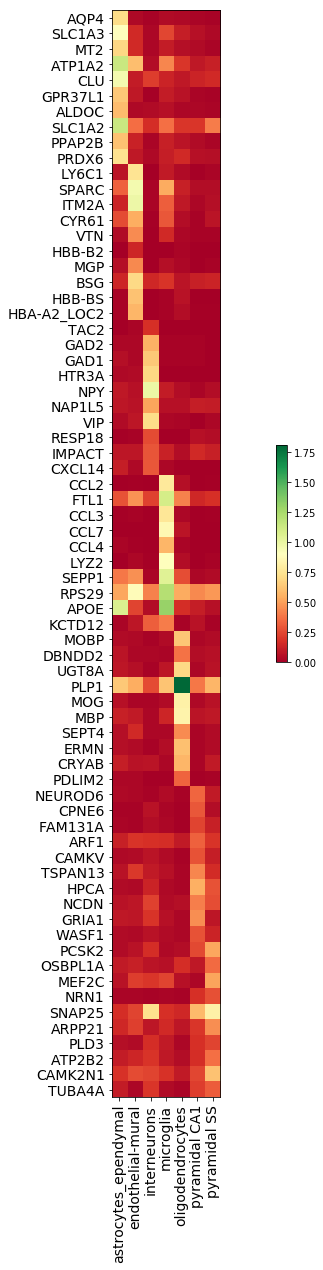

In [70]:
plt.figure(figsize=(20, 20))
im = plt.imshow(expression, cmap='RdYlGn', interpolation='none', aspect='equal')
ax = plt.gca()
ax.set_xticks(np.arange(0, 7, 1))
ax.set_xticklabels(gene_dataset.cell_types, rotation='vertical')
ax.set_yticklabels(genes)
ax.set_yticks(np.arange(0, 70, 1))
ax.tick_params(labelsize=14)
plt.colorbar(shrink=0.2)

## Correction for batch effects

First we load the RETINA dataset that is described in

* Shekhar, Karthik, et al. "Comprehensive classification of retinal bipolar neurons by single-cell transcriptomics." Cell 166.5 (2016): 1308-1323.

In [71]:
gene_dataset = RetinaDataset(save_path=save_path)

Preprocessing dataset
Finished preprocessing dataset


In [72]:
n_epochs=50 if n_epochs_all is None else n_epochs_all
lr=1e-3
use_batches=True
use_cuda=True

### Train the model and output model likelihood every 5 epochs
vae = VAE(gene_dataset.nb_genes, n_batch=gene_dataset.n_batches * use_batches)
trainer = UnsupervisedTrainer(vae, 
                              gene_dataset, 
                              train_size=0.9, 
                              use_cuda=use_cuda,
                              frequency=5)
trainer.train(n_epochs=n_epochs, lr=lr)

training: 100%|██████████| 50/50 [02:41<00:00,  3.23s/it]


(2891.19500868542, 3500)

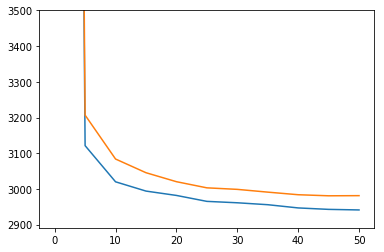

In [73]:
# Plotting the likelihood change across the 50 epochs of training: blue for training error and orange for testing error. 

ll_train = trainer.history["ll_train_set"]
ll_test = trainer.history["ll_test_set"]
x = np.linspace(0,50,(len(ll_train)))
plt.plot(x, ll_train)
plt.plot(x, ll_test)
plt.ylim(min(ll_train)-50, 3500)

**Computing batch mixing**

In [74]:
full = trainer.create_posterior(trainer.model, gene_dataset, indices=np.arange(len(gene_dataset)))
print("Entropy batch mixing :", full.entropy_batch_mixing())

Entropy batch mixing : 0.6011671206508317


**Coloring by batch and cell type**

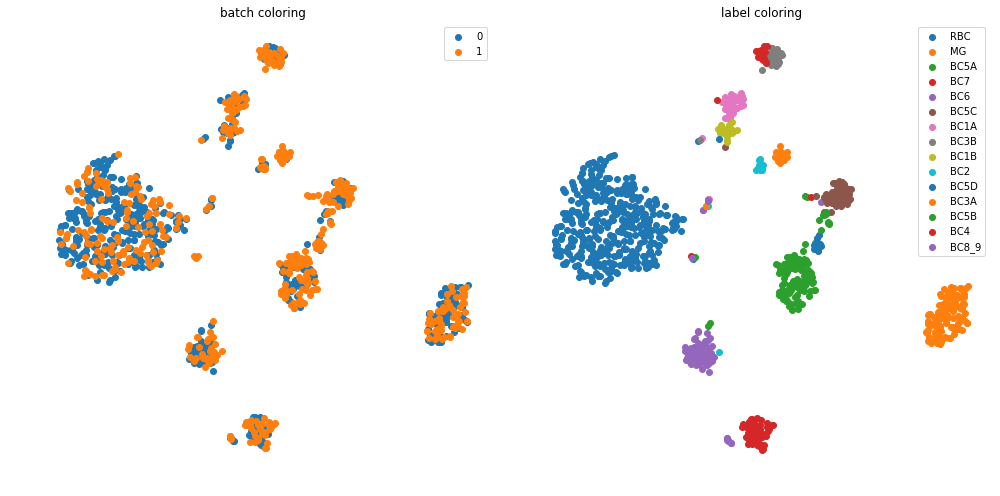

In [75]:
# obtaining latent space in the same order as the input data
n_samples_tsne = 1000
full.show_t_sne(n_samples=n_samples_tsne, color_by='batches and labels')

In [76]:
def allow_notebook_for_test():
    print("Testing the basic tutorial notebook")